### Import Library

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Import DataSet

In [50]:
df = pd.read_csv('nike_sales_uncleaned.csv')

### Inspect

In [51]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [52]:
df.shape

(2500, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [54]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


In [55]:
df.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

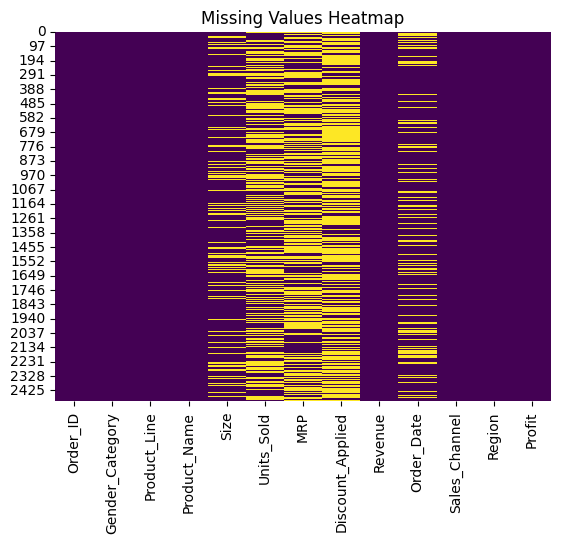

In [56]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [57]:
df.duplicated().sum()

np.int64(0)

### Data Validation & Cleaning

In [58]:
df2=df.copy()

In [59]:
df2.drop_duplicates(inplace=True)

In [60]:
df2['Units_Sold'].fillna(df2['Units_Sold'].median(), inplace=True)
df2['MRP'].replace(0, np.nan, inplace=True)
df2['MRP'].fillna(df2['MRP'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20732\3603479952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Units_Sold'].fillna(df2['Units_Sold'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_20732\3603479952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [61]:
df2.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold             0
MRP                    0
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

In [62]:
df2['Size'].fillna(df2['Size'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20732\3700487824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Size'].fillna(df2['Size'].mode()[0], inplace=True)


In [63]:
df2.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                   0
Units_Sold             0
MRP                    0
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

In [64]:
df2 = df2[df2['Units_Sold'] >= 0]
df2 = df2[df2['Discount_Applied'].between(0, 100)]
df2 = df2[df2['MRP'] > 0]

In [65]:
df2["Order_Date"] = pd.to_datetime(df2["Order_Date"], errors='coerce', infer_datetime_format=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20732\1937743546.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2["Order_Date"] = pd.to_datetime(df2["Order_Date"], errors='coerce', infer_datetime_format=True)


In [66]:
df2.isnull().sum()

Order_ID              0
Gender_Category       0
Product_Line          0
Product_Name          0
Size                  0
Units_Sold            0
MRP                   0
Discount_Applied      0
Revenue               0
Order_Date          596
Sales_Channel         0
Region                0
Profit                0
dtype: int64

In [67]:
df2.dropna(subset=['Order_Date'], inplace=True)

In [68]:
df2.isnull().sum()

Order_ID            0
Gender_Category     0
Product_Line        0
Product_Name        0
Size                0
Units_Sold          0
MRP                 0
Discount_Applied    0
Revenue             0
Order_Date          0
Sales_Channel       0
Region              0
Profit              0
dtype: int64

###  Feature Engineering

In [69]:
df2['Year'] = df2['Order_Date'].dt.year
df2['Month'] = df2['Order_Date'].dt.month
df2['Day'] = df2['Order_Date'].dt.day
df2['Weekday'] = df2['Order_Date'].dt.day_name()

In [70]:
df['Revenue_Corrected'] = (df['MRP'] * (1 - df['Discount_Applied']/100)) * df['Units_Sold']

In [71]:
cat_cols = ['Gender_Category', 'Product_Line', 'Sales_Channel', 'Region']
le = LabelEncoder()
for col in cat_cols:
    df2[col] = le.fit_transform(df2[col].astype(str))


In [72]:
df2.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Year,Month,Day,Weekday
0,2000,0,4,SuperRep Go,M,2.0,6110.03,0.47,0.00,2024-03-09,0,7,-770.45,2024,3,9,Saturday
26,2026,0,1,Blazer Mid,XL,1.0,6110.03,0.16,0.00,2024-08-10,1,4,2301.64,2024,8,10,Saturday
31,2031,1,3,Premier III,L,4.0,3493.04,0.82,2514.99,2024-05-09,0,1,350.70,2024,5,9,Thursday
43,2043,1,3,Premier III,XL,2.0,3492.89,0.77,0.00,2024-05-02,1,1,3770.75,2024,5,2,Thursday
51,2051,2,0,Air Jordan,XL,2.0,6110.03,0.37,0.00,2024-01-05,1,1,3135.98,2024,1,5,Friday


### Normalization & Standardization

In [ ]:
scaler = StandardScaler()
num_cols = ['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue_Corrected', 'Profit']
df2[num_cols] = scaler.fit_transform(df2[num_cols])

### Visualization

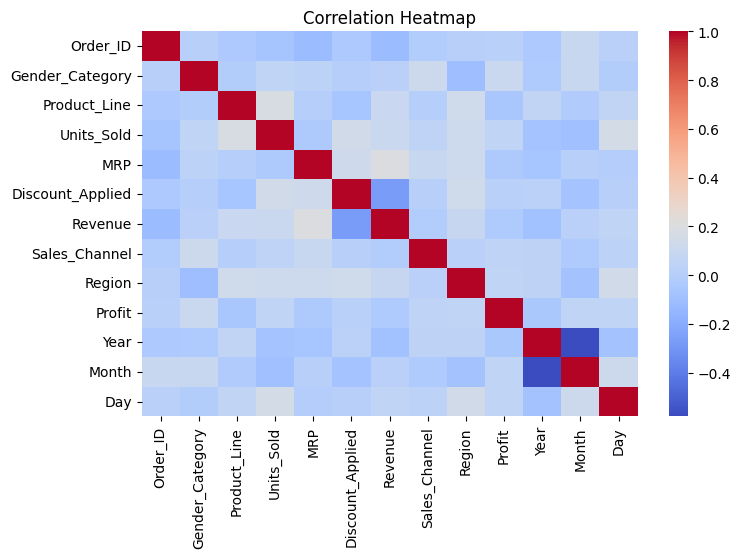

In [ ]:

numeric_df = df2.select_dtypes(include=['number'])


plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


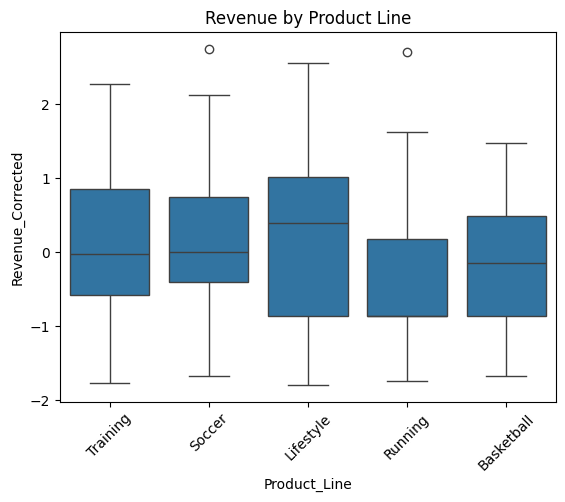

In [ ]:
sns.boxplot(x='Product_Line', y='Revenue_Corrected', data=df2)
plt.title("Revenue by Product Line")
plt.xticks(rotation=45)
plt.show()

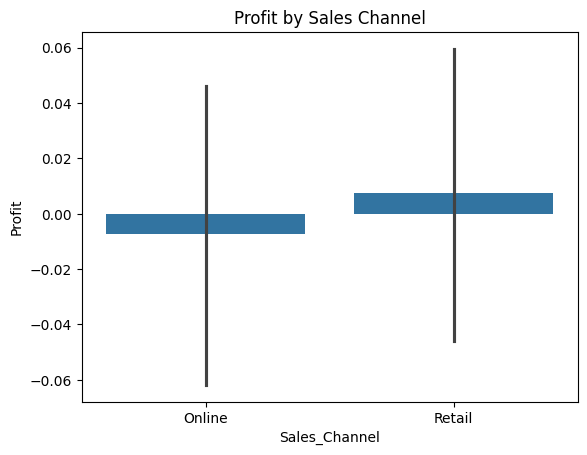

In [ ]:
sns.barplot(x='Sales_Channel', y='Profit', data=df2)
plt.title("Profit by Sales Channel")
plt.show()


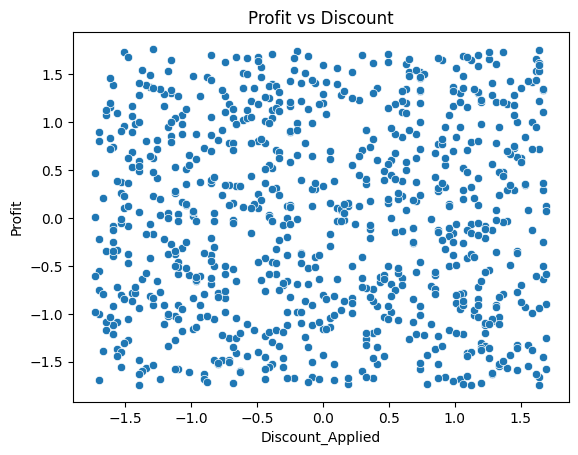

In [ ]:
sns.scatterplot(x='Discount_Applied', y='Profit', data=df2)
plt.title("Profit vs Discount")
plt.show()

### Feature Selection

In [ ]:

numeric_df = df2.select_dtypes(include=['number'])

corr_target = numeric_df.corr()['Profit'].sort_values(ascending=False)

print(corr_target)


Profit              1.000000
Gender_Category     0.100375
Month               0.055354
Units_Sold          0.053033
Region              0.052346
Day                 0.051864
Sales_Channel       0.047731
Discount_Applied    0.015276
Order_ID            0.014185
Revenue            -0.024563
MRP                -0.035338
Year               -0.044331
Product_Line       -0.050464
Name: Profit, dtype: float64


### Model Fitting

In [86]:
df2.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Year,Month,Day,Weekday
0,2000,0,4,SuperRep Go,M,2.0,6110.03,0.47,0.00,2024-03-09,0,7,-770.45,2024,3,9,Saturday
26,2026,0,1,Blazer Mid,XL,1.0,6110.03,0.16,0.00,2024-08-10,1,4,2301.64,2024,8,10,Saturday
31,2031,1,3,Premier III,L,4.0,3493.04,0.82,2514.99,2024-05-09,0,1,350.70,2024,5,9,Thursday
43,2043,1,3,Premier III,XL,2.0,3492.89,0.77,0.00,2024-05-02,1,1,3770.75,2024,5,2,Thursday
51,2051,2,0,Air Jordan,XL,2.0,6110.03,0.37,0.00,2024-01-05,1,1,3135.98,2024,1,5,Friday


In [87]:
X = df2[['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Gender_Category', 'Product_Line', 'Sales_Channel', 'Region']]
y = df2['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
y_pred = model.predict(X_test)